In [2]:
import torch
from torch import nn

embedding = nn.Embedding(10, 3)
input = torch.LongTensor([[1, 2, 4, 5],[4, 3, 2, 0]])
embedding(input)

tensor([[[-1.7154, -0.3796,  1.1986],
         [-0.2702,  0.0580, -0.1763],
         [-1.0898, -0.4915, -1.2161],
         [-1.3465, -1.0456, -0.5301]],

        [[-1.0898, -0.4915, -1.2161],
         [-1.4858,  0.1582,  0.6484],
         [-0.2702,  0.0580, -0.1763],
         [ 1.1180,  1.1031, -0.4801]]], grad_fn=<EmbeddingBackward0>)

In [3]:
embedding = nn.Embedding(10, 3, padding_idx=0)
input = torch.LongTensor([[0, 2, 0, 5]])
embedding(input)

tensor([[[ 0.0000,  0.0000,  0.0000],
         [ 0.9356,  0.3439, -0.4752],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.9047, -0.1173, -0.7522]]], grad_fn=<EmbeddingBackward0>)

In [4]:
import math

class Embeddings(nn.Module):
    def __init__(self, d_model, vocab):
        super(Embeddings, self).__init__()
        self.lut = nn.Embedding(vocab, d_model)
        self.d_model = d_model

    def forward(self, x):
        return self.lut(x) * math.sqrt(self.d_model)
    
d_model = 512
vocab = 1000
x = torch.LongTensor([[100,2,421,508],[491,998,1,221]])
emb = Embeddings(d_model, vocab)
embr = emb(x)
print("embr:", embr)

embr: tensor([[[  1.6915, -10.0383, -48.4048,  ..., -32.6809, -23.2183,  24.0230],
         [  4.5072, -39.6910,   6.9739,  ..., -16.9322,  21.5810, -14.6581],
         [-33.5574,  15.9538,  28.0040,  ...,  15.3379,   3.6651,   5.7678],
         [ 11.1774, -23.5950,  25.3121,  ...,  12.3324,  24.3173, -33.4307]],

        [[ -5.8937, -15.2101,   9.3811,  ...,  15.0427,   9.6020, -22.6974],
         [-21.6922,  -1.3313, -56.7308,  ...,   8.9164,  -1.1304,  -3.1389],
         [ 47.5384,  12.1539,  -3.2243,  ..., -19.3812,  23.9907,   5.4538],
         [-16.8967, -46.6928,   6.4109,  ...,  12.8163, -31.8154,   7.0101]]],
       grad_fn=<MulBackward0>)


In [5]:
x = torch.tensor([1, 2, 3, 4])
print(torch.unsqueeze(x, 0))
print(torch.unsqueeze(x, 1))

tensor([[1, 2, 3, 4]])
tensor([[1],
        [2],
        [3],
        [4]])


In [6]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1) 
        div_term = torch.exp(torch.arange(0, d_model, 2, dtype=torch.float) 
                             * -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

dropout = 0.1
max_len=60

x = embr
pe = PositionalEncoding(d_model, dropout, max_len)
pe_result = pe(x)
print("pe_result:", pe_result)

pe_result: tensor([[[  1.8794, -10.0425, -53.7831,  ..., -35.2010, -25.7981,  27.8033],
         [  5.9430, -43.5008,   8.6619,  ..., -17.7025,  23.9790, -15.1757],
         [-36.2757,  17.2641,  32.1561,  ...,   0.0000,   4.0726,   0.0000],
         [ 12.5762, -27.3167,  28.3969,  ...,  14.8137,  27.0195, -36.0341]],

        [[ -6.5485,  -0.0000,  10.4234,  ...,  17.8253,  10.6688, -24.1082],
         [-23.1675,  -0.8789, -62.1210,  ...,  11.0182,  -1.2559,  -2.3765],
         [  0.0000,   0.0000,  -2.5421,  ..., -20.4235,  26.6566,   7.1709],
         [-18.6173, -52.9808,   0.0000,  ...,  15.3514, -35.3501,   8.9001]]],
       grad_fn=<MulBackward0>)


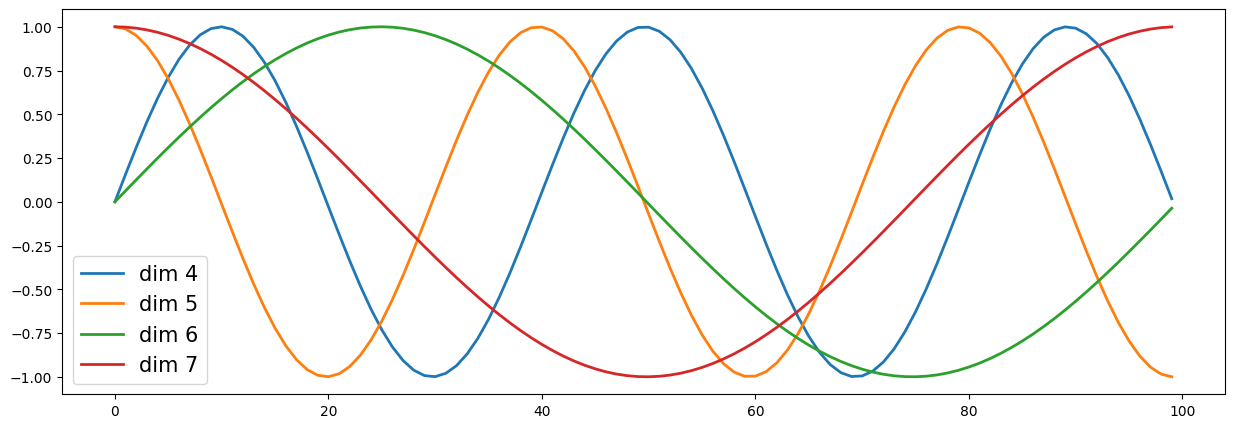

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))
pe = PositionalEncoding(20, 0)
y = pe(torch.zeros(1, 100, 20))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy(), linewidth=2)
plt.legend(["dim %d"%p for p in [4,5,6,7]], fontsize=15)
plt.show()

In [8]:
mat = [[1,2,3], [4,5,6], [7,8,9], [10,11,12]]

print(np.triu(mat, k=-1))
print(np.triu(mat, k=0))
print(np.triu(mat, k=1))

[[ 1  2  3]
 [ 4  5  6]
 [ 0  8  9]
 [ 0  0 12]]
[[1 2 3]
 [0 5 6]
 [0 0 9]
 [0 0 0]]
[[0 2 3]
 [0 0 6]
 [0 0 0]
 [0 0 0]]


In [9]:
def subsequent_mask(size):
    attn_shape = (1, size, size)
    subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8')
    return torch.from_numpy(1 - subsequent_mask)

size = 4
sm = subsequent_mask(size)
print("sm:", sm)

sm: tensor([[[1, 0, 0, 0],
         [1, 1, 0, 0],
         [1, 1, 1, 0],
         [1, 1, 1, 1]]], dtype=torch.uint8)


In [10]:
import torch.nn.functional as F

def attention(query, key, value, mask=None, dropout=None):
    d_k = query.size(-1)
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)

    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)

    p_attn = F.softmax(scores, dim = -1)
    if dropout is not None:
        p_attn = dropout(p_attn)

    return torch.matmul(p_attn, value), p_attn


query = key = value = pe_result
mask = torch.zeros(2, 4, 4)
attn, p_attn = attention(query, key, value, mask=mask)
print("attn:", attn)
print("p_attn:", p_attn)

attn: tensor([[[ -3.9693, -15.8990,   3.8579,  ...,  -9.5224,   7.3183,  -5.8516],
         [ -3.9693, -15.8990,   3.8579,  ...,  -9.5224,   7.3183,  -5.8516],
         [ -3.9693, -15.8990,   3.8579,  ...,  -9.5224,   7.3183,  -5.8516],
         [ -3.9693, -15.8990,   3.8579,  ...,  -9.5224,   7.3183,  -5.8516]],

        [[-12.0833, -13.4649, -13.5599,  ...,   5.9429,   0.1799,  -2.6034],
         [-12.0833, -13.4649, -13.5599,  ...,   5.9429,   0.1799,  -2.6034],
         [-12.0833, -13.4649, -13.5599,  ...,   5.9429,   0.1799,  -2.6034],
         [-12.0833, -13.4649, -13.5599,  ...,   5.9429,   0.1799,  -2.6034]]],
       grad_fn=<UnsafeViewBackward0>)
p_attn: tensor([[[0.2500, 0.2500, 0.2500, 0.2500],
         [0.2500, 0.2500, 0.2500, 0.2500],
         [0.2500, 0.2500, 0.2500, 0.2500],
         [0.2500, 0.2500, 0.2500, 0.2500]],

        [[0.2500, 0.2500, 0.2500, 0.2500],
         [0.2500, 0.2500, 0.2500, 0.2500],
         [0.2500, 0.2500, 0.2500, 0.2500],
         [0.2500, 0.2500,

In [13]:
import copy

def clones(module, N):
    return nn.ModuleList([copy.deepcopy(module) for _ in range(N)])

class MultiHeadedAttention(nn.Module):
    def __init__(self, head, embedding_dim, dropout=0.1):
        super(MultiHeadedAttention, self).__init__()
        assert embedding_dim % head == 0
        self.d_k = embedding_dim // head
        self.head = head
        self.linears = clones(nn.Linear(embedding_dim, embedding_dim), 4)
        self.attn = None
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, query, key, value, mask=None):
        if mask is not None:
            mask = mask.unsqueeze(0)
        batch_size = query.size(0)
        query, key, value = \
           [model(x).view(batch_size, -1, self.head, self.d_k).transpose(1, 2)
            for model, x in zip(self.linears, (query, key, value))]
        x, self.attn = attention(query, key, value, mask=mask, dropout=self.dropout)
        x = x.transpose(1, 2).contiguous().view(batch_size, -1, self.head * self.d_k)
        return self.linears[-1](x)

In [14]:
head = 8
embedding_dim = 512
dropout = 0.2

query = value = key = pe_result
mask = torch.zeros(8, 4, 4)

mha = MultiHeadedAttention(head, embedding_dim, dropout)
mha_result = mha(query, key, value, mask)
print(mha_result)

tensor([[[-1.2561, -3.7909,  5.9235,  ..., -3.3730, -3.7386, -8.7749],
         [-2.8995, -2.5098,  3.1341,  ..., -0.8260, -1.6129, -4.2850],
         [-3.5346,  2.5107,  4.8079,  ...,  1.1325,  0.0138, -1.3151],
         [ 0.4407,  1.4508,  5.6698,  ..., -1.6154, -2.6118, -2.8160]],

        [[-0.9745, -0.0587,  1.8543,  ...,  0.2042, -7.7086, -1.6614],
         [-3.4091,  1.2926,  1.8548,  ..., -3.2294, -7.0836,  0.1479],
         [-1.4311, -1.0579,  0.4344,  ...,  1.0390, -5.9774, -1.0675],
         [-2.6655, -1.0441, -0.2568,  ..., -2.3255, -7.3711,  1.5803]]],
       grad_fn=<ViewBackward0>)


In [23]:
class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.w1 = nn.Linear(d_model, d_ff)
        self.w2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.w2(self.dropout(F.relu(self.w1(x))))
    
    
d_model = 512
d_ff = 64
dropout = 0.2
x = mha_result
ff = PositionwiseFeedForward(d_model, d_ff, dropout)
ff_result = ff(x)
print(ff_result)

tensor([[[-0.0190, -0.4636,  0.5372,  ...,  0.8872, -0.9226, -1.7734],
         [ 1.1885, -1.1952,  1.0132,  ...,  0.6029, -0.6581, -1.5036],
         [ 0.4627, -0.1174,  1.1199,  ...,  0.8703, -0.3076, -1.4642],
         [ 1.2982,  0.5354,  1.3637,  ...,  1.3553, -0.8239, -1.6280]],

        [[ 1.7081, -2.0955, -1.5920,  ...,  0.1776,  0.6554,  0.5810],
         [ 1.2469, -1.2608, -0.3507,  ..., -0.4612, -0.3333,  0.4229],
         [ 1.2406, -1.6885, -0.8166,  ...,  0.7104,  0.3660,  0.8230],
         [ 0.3499, -1.9578,  0.2919,  ..., -1.0932, -1.0828, -0.9282]]],
       grad_fn=<ViewBackward0>)


In [27]:
class LayerNorm(nn.Module):
    def __init__(self, features, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.a2 = nn.Parameter(torch.ones(features))
        self.b2 = nn.Parameter(torch.zeros(features))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        return self.a2 * (x - mean) / (std + self.eps) + self.b2
    
features = d_model = 512
eps = 1e-6
ln = LayerNorm(features, eps)
ln_result = ln(x)
print(ln_result)

tensor([[[ 0.0538, -0.4764, -2.4217,  ..., -1.5953, -1.1771,  1.2067],
         [ 0.2725, -1.8205,  0.3876,  ..., -0.7285,  1.0360, -0.6215],
         [-1.5068,  0.7294,  1.3514,  ...,  0.0083,  0.1784,  0.0083],
         [ 0.5489, -1.1501,  1.2227,  ...,  0.6442,  1.1640, -1.5213]],

        [[-0.3218, -0.0619,  0.3516,  ...,  0.6453,  0.3614, -1.0185],
         [-0.9741, -0.0520, -2.5856,  ...,  0.4402, -0.0676, -0.1140],
         [-0.0045, -0.0045, -0.1068,  ..., -0.8264,  1.0681,  0.2840],
         [-0.8067, -2.3608,  0.0353,  ...,  0.7296, -1.5634,  0.4378]]],
       grad_fn=<AddBackward0>)


In [41]:
class SublayerConnection(nn.Module):
    def __init__(self, size, dropout=0.1):
        super(SublayerConnection, self).__init__()
        self.norm = LayerNorm(size)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, sublayer):
        return x + self.dropout(sublayer(self.norm(x)))
    
size = 512
dropout = 0.2
head = 8
d_model = 512
x = pe_result
mask = torch.zeros(8, 4, 4)
self_attn =  MultiHeadedAttention(head, d_model)
sublayer = lambda x: self_attn(x, x, x, mask)

sc = SublayerConnection(size, dropout)
sc_result = sc(x, sublayer)

In [42]:
print(sc_result)
print(sc_result.shape)

tensor([[[  1.8683,  -9.9205, -53.7532,  ..., -34.9031, -25.7442,  27.3980],
         [  5.8661, -43.3718,   8.7512,  ..., -17.7025,  24.0082, -15.6016],
         [-36.4253,  17.3069,  32.1225,  ...,   0.3500,   4.0205,  -0.3586],
         [ 12.5067, -27.2927,  28.4755,  ...,  14.8137,  27.0996, -36.3107]],

        [[ -6.3654,  -0.3239,  10.1940,  ...,  17.6716,  10.8243, -23.9746],
         [-22.9475,  -1.1026, -62.2567,  ...,  10.8770,  -1.1748,  -2.2972],
         [  0.1446,  -0.2586,  -2.6867,  ..., -20.6134,  26.7857,   7.1709],
         [-18.3782, -53.2479,   0.0000,  ...,  15.0879, -35.2131,   9.0532]]],
       grad_fn=<AddBackward0>)
torch.Size([2, 4, 512])


In [43]:
class EncoderLayer(nn.Module):
    def __init__(self, size, self_attn, feed_forward, dropout):
        super(EncoderLayer, self).__init__()

        self.self_attn = self_attn
        self.feed_forward = feed_forward
        self.sublayer = clones(SublayerConnection(size, dropout), 2)
        self.size = size

    def forward(self, x, mask):
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, mask))
        return self.sublayer[1](x, self.feed_forward)
    
size = 512
head = 8
d_model = 512
d_ff = 64
x = pe_result
dropout = 0.2
self_attn = MultiHeadedAttention(head, d_model)
ff = PositionwiseFeedForward(d_model, d_ff, dropout)
mask = torch.zeros(8, 4, 4)
el = EncoderLayer(size, self_attn, ff, dropout)
el_result = el(x, mask)

In [44]:
print(el_result)
print(el_result.shape)

tensor([[[  1.6142, -10.1185, -54.0936,  ..., -35.2881, -25.5171,  28.4419],
         [  6.0134, -43.8749,   9.0824,  ..., -17.5646,  24.7309, -15.3377],
         [-36.0181,  16.9859,  32.3165,  ...,  -0.1422,   4.4427,   0.4878],
         [ 12.6800, -27.3127,  28.5214,  ...,  15.7132,  27.3325, -35.5538]],

        [[ -6.5169,   0.2837,   9.1411,  ...,  17.7516,  10.6891, -24.0891],
         [-23.5296,  -0.7209, -62.2175,  ...,  11.0245,  -1.3479,  -2.5784],
         [ -0.7231,  -0.2119,  -3.0494,  ..., -19.6906,  26.7056,   7.9836],
         [-18.7973, -52.6466,  -0.2729,  ...,  15.8187, -35.5225,   8.4876]]],
       grad_fn=<AddBackward0>)
torch.Size([2, 4, 512])


In [45]:
class Encoder(nn.Module):
    def __init__(self, layer, N):
        super(Encoder, self).__init__()
        self.layers = clones(layer, N)
        self.norm = LayerNorm(layer.size)

    def forward(self, x, mask):
        for layer in self.layers:
            x = layer(x, mask)
        return self.norm(x)
    
size = 512
head = 8
d_model = 512
d_ff = 64
c = copy.deepcopy
attn = MultiHeadedAttention(head, d_model)
ff = PositionwiseFeedForward(d_model, d_ff, dropout)
dropout = 0.2
layer = EncoderLayer(size, c(attn), c(ff), dropout)
N = 8
mask = torch.zeros(8, 4, 4)
en = Encoder(layer, N)
en_result = en(x, mask)

In [46]:
print(en_result)
print(en_result.shape)

tensor([[[ 0.0585, -0.5004, -2.4689,  ..., -1.3946, -1.2280,  1.2768],
         [ 0.2178, -1.7251,  0.3640,  ..., -0.5514,  0.9293, -0.5553],
         [-1.6000,  0.6555,  1.4357,  ...,  0.1924,  0.0907,  0.0782],
         [ 0.5332, -1.1503,  1.1982,  ...,  0.7515,  0.8123, -1.4487]],

        [[-0.4541, -0.0124,  0.3005,  ...,  0.6693,  0.2244, -0.9769],
         [-0.9685, -0.1547, -2.6625,  ...,  0.4529, -0.2911, -0.0931],
         [-0.0642, -0.0292, -0.0607,  ..., -0.8330,  0.9658,  0.2504],
         [-1.0465, -2.3006,  0.1122,  ...,  0.8008, -1.7585,  0.4501]]],
       grad_fn=<AddBackward0>)
torch.Size([2, 4, 512])


In [49]:
class DecoderLayer(nn.Module):
    def __init__(self, size, self_attn, src_attn, feed_forward, dropout):
        super(DecoderLayer, self).__init__()
        self.size = size
        self.self_attn = self_attn
        self.src_attn = src_attn
        self.feed_forward = feed_forward
        self.sublayer = clones(SublayerConnection(size, dropout), 3)

    def forward(self, x, memory, source_mask, target_mask):
        m = memory
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, target_mask))
        x = self.sublayer[1](x, lambda x: self.src_attn(x, m, m, source_mask))
        return self.sublayer[2](x, self.feed_forward)
    
head = 8
size = 512
d_model = 512
d_ff = 64
dropout = 0.2
self_attn = src_attn = MultiHeadedAttention(head, d_model, dropout)
ff = PositionwiseFeedForward(d_model, d_ff, dropout)
x = pe_result
memory = en_result
mask = torch.zeros(8, 4, 4)
source_mask = target_mask = mask
dl = DecoderLayer(size, self_attn, src_attn, ff, dropout)
dl_result = dl(x, memory, source_mask, target_mask)

In [50]:
print(dl_result)
print(dl_result.shape)

tensor([[[  1.5069, -10.4655, -53.8795,  ..., -35.1440, -26.3605,  27.3824],
         [  5.7965, -43.3231,   8.4166,  ..., -17.0828,  23.2807, -15.5862],
         [-36.6930,  17.6205,  32.4596,  ...,   0.1836,   3.2441,  -1.1893],
         [ 12.1765, -27.1649,  28.0014,  ...,  15.2165,  26.1366, -36.5590]],

        [[ -6.9613,   0.6421,  10.5129,  ...,  17.4891,  10.6688, -24.4351],
         [-23.3157,  -1.0833, -61.4666,  ...,  11.2681,  -1.9841,  -2.3310],
         [ -0.5233,   0.3544,  -2.0511,  ..., -20.6485,  25.8392,   6.5970],
         [-19.3094, -52.3216,   0.6019,  ...,  15.5379, -35.9940,   9.0713]]],
       grad_fn=<AddBackward0>)
torch.Size([2, 4, 512])


In [55]:
class Decoder(nn.Module):
    def __init__(self, layer, N):
        super(Decoder, self).__init__()
        self.layers = clones(layer, N)
        self.norm = LayerNorm(layer.size)

    def forward(self, x, memory, source_mask, target_mask): 
        for layer in self.layers:
            x = layer(x, memory, source_mask, target_mask)
        return self.norm(x)
    
size = 512
d_model = 512
head = 8
d_ff = 64
dropout = 0.2
c = copy.deepcopy
attn = MultiHeadedAttention(head, d_model)
ff = PositionwiseFeedForward(d_model, d_ff, dropout)
layer = DecoderLayer(d_model, c(attn), c(attn), c(ff), dropout)
N = 8
x = pe_result
memory = en_result
mask = torch.zeros(8, 4, 4)
source_mask = target_mask = mask
de = Decoder(layer, N)
de_result = de(x, memory, source_mask, target_mask)

In [56]:
print(de_result)
print(de_result.shape)

tensor([[[ 0.2682, -0.3396, -2.4071,  ..., -1.5155, -1.1057,  1.4718],
         [ 0.3611, -1.7485,  0.5689,  ..., -0.5771,  0.9580, -0.1293],
         [-1.3628,  0.7147,  1.3933,  ...,  0.1845,  0.1464,  0.3599],
         [ 0.6904, -1.1566,  1.3469,  ...,  0.7061,  1.2254, -1.2757]],

        [[-0.3197,  0.0409,  0.5749,  ...,  0.7076,  0.1199, -0.9301],
         [-0.9353, -0.0034, -2.3883,  ...,  0.5811, -0.3176, -0.0323],
         [ 0.0182, -0.1076,  0.0195,  ..., -0.7479,  0.8681,  0.2368],
         [-0.8660, -2.2744,  0.2312,  ...,  0.7607, -1.8098,  0.4306]]],
       grad_fn=<AddBackward0>)
torch.Size([2, 4, 512])


In [57]:
class Generator(nn.Module):
    def __init__(self, d_model, vocab_size):
        super(Generator, self).__init__()
        self.project = nn.Linear(d_model, vocab_size)

    def forward(self, x):
        return F.log_softmax(self.project(x), dim=-1)
    
d_model = 512
vocab_size = 1000
x = de_result
gen = Generator(d_model, vocab_size)
gen_result = gen(x)

In [58]:
print(gen_result)
print(gen_result.shape)

tensor([[[-6.3853, -7.8396, -6.1764,  ..., -6.9542, -7.3331, -7.2725],
         [-6.3125, -7.6771, -6.5457,  ..., -6.8733, -6.4408, -6.5981],
         [-7.8793, -6.6254, -7.2645,  ..., -7.1450, -7.4212, -7.5923],
         [-6.8165, -6.3280, -7.0729,  ..., -7.9606, -5.8516, -7.1175]],

        [[-6.9081, -6.8635, -6.9039,  ..., -7.3997, -6.4350, -6.7970],
         [-6.8936, -7.2516, -6.4175,  ..., -8.6241, -6.5665, -6.1434],
         [-6.9152, -6.9909, -6.8430,  ..., -7.2831, -7.0553, -8.0046],
         [-7.3220, -6.9406, -6.2439,  ..., -8.0602, -7.1914, -7.4034]]],
       grad_fn=<LogSoftmaxBackward0>)
torch.Size([2, 4, 1000])


In [60]:
class EncoderDecoder(nn.Module):
    def __init__(self, encoder, decoder, source_embed, target_embed, generator):
        super(EncoderDecoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.src_embed = source_embed
        self.tgt_embed = target_embed
        self.generator = generator

    def forward(self, source, target, source_mask, target_mask):
        return self.decode(self.encode(source, source_mask), 
                           source_mask, target, target_mask)

    def encode(self, source, source_mask):
        return self.encoder(self.src_embed(source), 
                            source_mask)

    def decode(self, memory, source_mask, target, target_mask):
        return self.decoder(self.tgt_embed(target), 
                            memory, source_mask, target_mask)
    
vocab_size = 1000
d_model = 512
encoder = en
decoder = de
source_embed = nn.Embedding(vocab_size, d_model)
target_embed = nn.Embedding(vocab_size, d_model)
generator = gen
source = target = torch.LongTensor([[100, 2, 421, 508], [491, 998, 1, 221]])
source_mask = target_mask = torch.zeros(8, 4, 4)
ed = EncoderDecoder(encoder, decoder, source_embed, target_embed, generator)
ed_result = ed(source, target, source_mask, target_mask)

In [61]:
print(ed_result)
print(ed_result.shape)

tensor([[[-1.6373, -1.8184,  0.4482,  ...,  0.3209,  0.1814, -0.0418],
         [-1.4258, -1.5788,  0.9580,  ...,  0.1062, -0.3385, -0.1972],
         [-1.3119, -1.8023,  1.2739,  ..., -0.1019, -0.0505, -0.0551],
         [-0.9815, -1.7714,  1.6675,  ...,  0.9195, -0.4957, -0.2650]],

        [[-0.2317, -2.7016,  1.1747,  ..., -0.4007,  0.7334,  0.0873],
         [-2.0654, -1.4475,  1.1212,  ..., -0.8073,  1.2274,  1.0159],
         [-0.4999, -1.9603,  1.0090,  ..., -0.6711,  0.4517,  0.8213],
         [-0.5021, -1.9607,  1.4397,  ..., -0.6161, -0.2164,  0.2542]]],
       grad_fn=<AddBackward0>)
torch.Size([2, 4, 512])


In [63]:
def make_model(source_vocab, target_vocab, 
               N=6, d_model=512, d_ff=2048, head=8, dropout=0.1):
    c = copy.deepcopy
    attn = MultiHeadedAttention(head, d_model)
    ff = PositionwiseFeedForward(d_model, d_ff, dropout)
    position = PositionalEncoding(d_model, dropout)
    model = EncoderDecoder(
        Encoder(EncoderLayer(d_model, c(attn), c(ff), dropout), 
                N),
        Decoder(DecoderLayer(d_model, c(attn), c(attn), c(ff), dropout), 
                N),
        nn.Sequential(Embeddings(d_model, source_vocab), c(position)),
        nn.Sequential(Embeddings(d_model, target_vocab), c(position)),
        Generator(d_model, target_vocab))

    for p in model.parameters():
        if p.dim() > 1:
            nn.init.xavier_uniform_(p)
    return model

source_vocab = 11
target_vocab = 11 
N = 6
res = make_model(source_vocab, target_vocab, N)
print(res)

EncoderDecoder(
  (encoder): Encoder(
    (layers): ModuleList(
      (0-5): 6 x EncoderLayer(
        (self_attn): MultiHeadedAttention(
          (linears): ModuleList(
            (0-3): 4 x Linear(in_features=512, out_features=512, bias=True)
          )
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (feed_forward): PositionwiseFeedForward(
          (w1): Linear(in_features=512, out_features=2048, bias=True)
          (w2): Linear(in_features=2048, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (sublayer): ModuleList(
          (0-1): 2 x SublayerConnection(
            (norm): LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
    (norm): LayerNorm()
  )
  (decoder): Decoder(
    (layers): ModuleList(
      (0-5): 6 x DecoderLayer(
        (self_attn): MultiHeadedAttention(
          (linears): ModuleList(
            (0-3): 4 x Linear(in_features=512, out_fe